In [1]:
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras import *
from keras.src.layers import Dense, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data read in

image_size = (32, 32)
batch_size = 500

train_data, val_data = keras.utils.image_dataset_from_directory(
    "C:/Users/Esteban/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/Data/train",
    labels="inferred",
    validation_split=0.2,
    subset="both",
    seed=1354,
    image_size=image_size,
    batch_size=batch_size,
)


print("Training Classes:")
class_names = train_data.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.
Training Classes:
['FAKE', 'REAL']


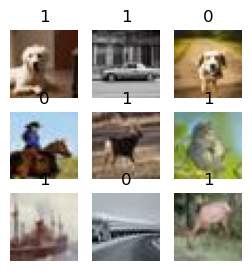

In [3]:
# Data Visualization

plt.figure(figsize=(3, 3))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
# Model

# Copied from keras:

# def make_model(input_shape, num_classes):
#     inputs = keras.Input(shape=input_shape)

#     # Entry block
#     x = layers.Rescaling(1.0 / 255)(inputs)
#     x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     previous_block_activation = x  # Set aside residual

#     for size in [256, 512, 728]:
#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(size, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(size, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

#         # Project residual
#         residual = layers.Conv2D(size, 1, strides=2, padding="same")(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     x = layers.SeparableConv2D(1024, 3, padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.GlobalAveragePooling2D()(x)
#     if num_classes == 2:
#         units = 1
#     else:
#         units = num_classes

#     x = layers.Dropout(0.25)(x)
#     # We specify activation=None so as to return logits
#     outputs = layers.Dense(units, activation=None)(x)
#     return keras.Model(inputs, outputs)


# model = make_model(input_shape=image_size + (3,), num_classes=2)
# keras.utils.plot_model(model, show_shapes=True)

In [27]:
# # Copied from keras:

# epochs = 5

# callbacks = [
#     keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(3e-4),
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy(name="acc")],
# )
# model.fit(
#     train_data,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_data=val_data,
# )

Epoch 1/5
160/160 [==============================] - 343s 2s/step - loss: 0.2478 - acc: 0.8918 - val_loss: 0.7498 - val_acc: 0.5049
Epoch 2/5
160/160 [==============================] - 332s 2s/step - loss: 0.1437 - acc: 0.9427 - val_loss: 1.3142 - val_acc: 0.5049
Epoch 3/5
160/160 [==============================] - 350s 2s/step - loss: 0.0940 - acc: 0.9626 - val_loss: 2.8873 - val_acc: 0.5049
Epoch 4/5
160/160 [==============================] - 328s 2s/step - loss: 0.0559 - acc: 0.9782 - val_loss: 4.9363 - val_acc: 0.5049
Epoch 5/5
160/160 [==============================] - 332s 2s/step - loss: 0.0374 - acc: 0.9855 - val_loss: 0.5193 - val_acc: 0.8755


In [7]:

# Creating the CNN

# Conv2D layers are the convolutional layers. They are used to detect patterns in the images.
# They detect edges, shapes, and textures in the images.

# Dense layers are the fully connected layers. 
# They are used to classify the patterns found by the convolutional layers.

# MaxPooling2D layers are used to reduce the spatial dimensions of the output volume.

# Idea: Convolution finds something useful, pooling pools it together to summarize
# The combination of convolution and pooling layers allows CNNs to combine local features and learn more global features of the image.
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

c:\Users\Esteban\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
epochs = 8

callbacks = [
    keras.callbacks.ModelCheckpoint("SecondAttemptCNN_save_at_{epoch}.keras"),
]

history = model.fit(
    train_data,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_data,
)

Epoch 1/8


c:\Users\Esteban\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:695: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


160/160 ━━━━━━━━━━━━━━━━━━━━ 38s 219ms/step - accuracy: 0.4995 - loss: 3.0974 - val_accuracy: 0.5045 - val_loss: 0.7228
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 36s 224ms/step - accuracy: 0.4989 - loss: 0.7068 - val_accuracy: 0.5129 - val_loss: 0.7056
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.5000 - loss: 0.6982 - val_accuracy: 0.4803 - val_loss: 0.6941
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 36s 225ms/step - accuracy: 0.4995 - loss: 0.6938 - val_accuracy: 0.4757 - val_loss: 0.6947
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.5013 - loss: 0.6936 - val_accuracy: 0.5395 - val_loss: 0.6926
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.4942 - loss: 0.6934 - val_accuracy: 0.5129 - val_loss: 0.6929
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4940 - val_loss: 0.6932
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accura

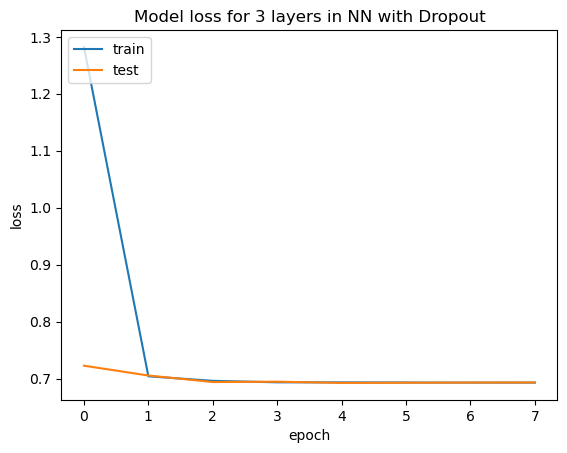

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for 3 layers in NN with Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

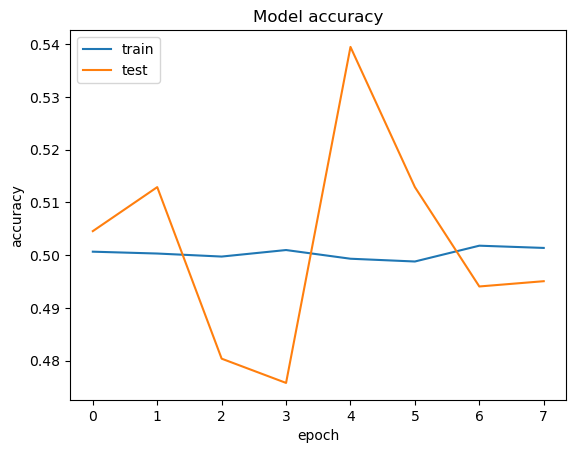

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Sad attempt at trying to put in an image to see if it works (ai image)

model = keras.models.load_model("SecondAttemptCNN_save_at_4.keras")
from keras.preprocessing.image import load_img
test_cat = load_img("C:/Users/Esteban/Downloads/11ab0d37c0a73c8880aeeb745bda07e1.jpg")
print(type(test_cat))
print(test_cat.format)
print(test_cat.mode)
print(test_cat.size)

test_cat = test_cat.resize((32, 32))

test_cat = np.array(test_cat).reshape(-1, 32, 32, 3)
test_cat = test_cat/255.0
print(test_cat)

print(model.predict(test_cat))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(640, 454)
[[[[0.09411765 0.14117647 0.08627451]
   [0.10588235 0.16470588 0.09803922]
   [0.11372549 0.16470588 0.09803922]
   ...
   [0.0627451  0.07843137 0.05098039]
   [0.1254902  0.20784314 0.1254902 ]
   [0.11372549 0.18039216 0.11372549]]

  [[0.10196078 0.15294118 0.09411765]
   [0.11372549 0.16470588 0.10588235]
   [0.11764706 0.16470588 0.10588235]
   ...
   [0.12941176 0.20392157 0.12156863]
   [0.13333333 0.21176471 0.12156863]
   [0.1372549  0.21176471 0.12941176]]

  [[0.11372549 0.16862745 0.10588235]
   [0.12941176 0.18431373 0.11764706]
   [0.1372549  0.18823529 0.11764706]
   ...
   [0.10980392 0.16470588 0.10588235]
   [0.09019608 0.13333333 0.08627451]
   [0.10196078 0.15294118 0.09803922]]

  ...

  [[0.49411765 0.51372549 0.5372549 ]
   [0.50588235 0.52156863 0.5372549 ]
   [0.52156863 0.53333333 0.54901961]
   ...
   [0.51372549 0.53333333 0.54509804]
   [0.50980392 0.52941176 0.54117647]
   [0.50196078 0.5215

In [18]:
# Sad attempt at trying to put in an image to see if it works (non-ai image)
from keras.preprocessing.image import load_img
test_cat = load_img("C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/Asana3808_Dashboard_Standard.jpg")
print(type(test_cat))
print(test_cat.format)
print(test_cat.mode)
print(test_cat.size)

test_cat = test_cat.resize((32, 32))

test_cat = np.array(test_cat).reshape(-1, 32, 32, 3)
test_cat = test_cat/255.0

print(model.predict(test_cat))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(660, 710)
1/1 [==============================] - 0s 21ms/step
[[2.0256562]]


In [21]:
print(model.predict(val_data.take(1))) #idk why the output is so long...

1/1 [==============================] - 0s 161ms/step
[[-4.3740582e+00]
 [ 1.4817536e+00]
 [ 3.6271863e+00]
 [ 4.0991035e+00]
 [-7.7425776e+00]
 [-5.9331427e+00]
 [-2.9490108e+00]
 [-6.9207764e+00]
 [-1.3418996e+00]
 [ 1.7290595e+00]
 [-2.4436383e+00]
 [-3.4382935e+00]
 [-1.6464851e+00]
 [-5.2410550e+00]
 [-4.0942101e+00]
 [-6.3603587e+00]
 [ 4.8844786e+00]
 [-2.3646994e+00]
 [-5.5115676e+00]
 [-6.6540060e+00]
 [-6.6255563e-01]
 [-1.9893470e+00]
 [ 4.2955985e+00]
 [ 6.1782179e+00]
 [ 4.1309681e+00]
 [-4.0975223e+00]
 [ 2.0719585e+00]
 [ 4.0249243e+00]
 [ 6.2830639e+00]
 [ 2.7275310e+00]
 [-5.5986319e+00]
 [-2.2894044e+00]
 [-5.4070206e+00]
 [-5.5791354e+00]
 [ 6.3479362e+00]
 [ 6.8761533e-01]
 [-3.8188868e+00]
 [ 2.2743337e+00]
 [-3.2203093e+00]
 [ 3.1146634e-01]
 [ 6.6050357e-01]
 [-2.4297879e+00]
 [ 5.4933949e+00]
 [ 3.5100346e+00]
 [-7.8389645e+00]
 [ 3.3311486e+00]
 [-1.6196690e+00]
 [-2.0732648e+00]
 [-6.5662675e+00]
 [ 9.0851955e+00]
 [ 6.5155854e+00]
 [ 4.3130264e+00]
 [ 4.916740